In [1]:
from model import Gmail
import matplotlib.pyplot as plt
import numpy as np
import random
from hash import Hasher

G = Gmail()

In [82]:
marc = G.get('MARC')

In [120]:
hours = G.get('MARC hours')
len(hours)

43

In [158]:
H = Hasher(5)
for m in hours:
    content = G.parse(m)
    H.add(content)
H.filter(.3)

In [115]:
inbox = G.get('INBOX')
random.shuffle(inbox)

In [116]:
i = 0
while H.n < 20:
    m = random.choice(inbox)
    content = G.parse(m)
    s = H.sim(content, .4)
    if s > .4:
        print(round(s,4), content[:100])
        H.add(content)
        G.labels.setLabel(m,['MARC hours','UNREAD'],['INBOX'])
    i += 1
    print(i, round(s,4), content[:50], end='\r')
print('done')

done


In [147]:
H.showFilter(.6)

{'have': 31,
 ' you': 32,
 'o.ed': 39,
 '.edu': 39,
 'lora': 39,
 ', 20': 39,
 'ing ': 26,
 ' 201': 39,
 '@col': 39,
 'and ': 30,
 'ave ': 26,
 ' and': 30,
 ' at ': 33,
 'olor': 39,
 ' to ': 41,
 'do.e': 39,
 ' the': 39,
 'for ': 28,
 'able': 26,
 'ado.': 39,
 'rom ': 27,
 ' for': 28,
 'from': 27,
 ' fro': 27,
 'e to': 40,
 'orad': 39,
 'the ': 30,
 ' hav': 31,
 'colo': 39,
 'rado': 39,
 't; w': 37,
 ' AM ': 31,
 'e:> ': 32,
 '19, ': 27,
 'e my': 27,
 'wrot': 37,
 '019,': 27,
 '; wr': 37,
 ' my ': 31,
 'gt; ': 37,
 'rote': 37,
 ' wro': 37,
 'u&gt': 38,
 'hour': 34,
 'edu&': 38,
 'ote:': 37,
 'te:H': 27,
 ' &lt': 38,
 '&gt;': 38,
 'ake ': 30,
 'to m': 28,
 'du&g': 38,
 'te:>': 35,
 '&lt;': 38,
 ' hou': 34,
 '2019': 33,
 ' if ': 28,
 '> On': 27,
 '>> I': 30,
 'now ': 26,
 'e:>>': 26,
 'On T': 31,
 ' On ': 27,
 ' me ': 26}

In [166]:
i = 0
random.shuffle(inbox)
for m in inbox:
    content = G.parse(m)
    s = H.sim(content, .3)
    if s > .5:
        print(round(s,4), content[:100])
#         H.add(content)
        G.labels.setLabel(m,['MARC hours','UNREAD'])
    i += 1
    print(i, round(s,4), content[:50], end='\r')
print('done')

0.5613 Hey, guysI have some trouble to go to my 7-8 office hour. Is there anyone want totake?Sincerely,JieN
0.7903 Hey, if someone wants my 7pm hour tonight, let me know!On Mon, Nov 4, 2019 at 4:14 PM Jie Wang  wrot
0.7129 I can make 6-7Thanks,Aazer Rae> On Nov 4, 2019, at 8:28 AM, Alexis Davis  wrote:> > Hi!> >     Somet
0.571 Hello Joe,It looks like my group has availability to meet this upcoming Tuesday from3:30 pm to 4:30 


KeyboardInterrupt: 

In [163]:
f = .3
scores = []
for m in inbox[:50]:
    content = G.parse(m)
    s = H.sim(content, f)
    scores.append(s)

In [164]:
h_scores = []
for m in hours:
    content = G.parse(m)
    s = H.sim(content, f)
    h_scores.append(s)

(array([1.11772129, 0.        , 0.55886065, 1.39715161, 3.6325942 ,
        1.67658194, 1.11772129, 0.55886065, 0.55886065, 1.39715161]),
 array([0.02903226, 0.11225806, 0.19548387, 0.27870968, 0.36193548,
        0.44516129, 0.5283871 , 0.6116129 , 0.69483871, 0.77806452,
        0.86129032]),
 <a list of 10 Patch objects>)

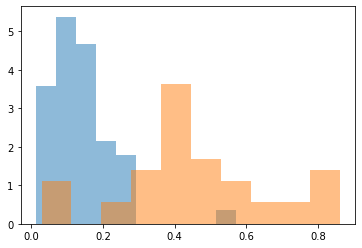

In [165]:
plt.hist(scores, density=True, alpha=.5)
plt.hist(h_scores, density=True, alpha=.5)